* KMeans[실습]

In [1]:
from sklearn.cluster import KMeans

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Wholesale customers dataset
uci_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv'
sample_df = pd.read_csv(uci_path)
sample_df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
# 데이터 자료형
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [4]:
# 데이터 통계 요약정보
sample_df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [5]:
# 분석에 사용할 피처를 카피
copy_df = sample_df.iloc[:,:]
copy_df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [6]:
# 표준화 진행
from sklearn.preprocessing import StandardScaler
copy_scaler = StandardScaler().fit_transform(copy_df)
copy_scaler

array([[ 1.44865163,  0.59066829,  0.05293319, ..., -0.58936716,
        -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197, ..., -0.27013618,
         0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926, ..., -0.13753572,
         0.13323164,  2.24329255],
       ...,
       [ 1.44865163,  0.59066829,  0.20032554, ..., -0.54337975,
         2.51121768,  0.12145607],
       [-0.69029709,  0.59066829, -0.13538389, ..., -0.41944059,
        -0.56977032,  0.21304614],
       [-0.69029709,  0.59066829, -0.72930698, ..., -0.62009417,
        -0.50488752, -0.52286938]])

In [7]:
# 군집모형 학습 및 예측
# 예측결과를 데이터 프레임에 추가

from sklearn.cluster import KMeans

sample_kmeans = KMeans(n_clusters = 6,init = 'k-means++', max_iter = 300, n_init = 10)
sample_kmeans.fit(copy_scaler)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [9]:
# sample_kmeans.labels_

copy_df['cluster_id'] = sample_kmeans.labels_
copy_df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster_id
0,2,3,12669,9656,7561,214,2674,1338,1
1,2,3,7057,9810,9568,1762,3293,1776,1
2,2,3,6353,8808,7684,2405,3516,7844,1
3,1,3,13265,1196,4221,6404,507,1788,0
4,2,3,22615,5410,7198,3915,1777,5185,1


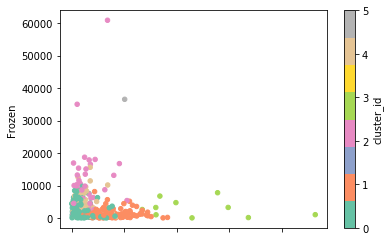

In [12]:
# 시각화
# plt.scatter(x=copy_df['Grocery'], y=copy_df['Frozen'], c=copy_df['cluster_id'])
# plt.show()
copy_df.plot(kind='scatter', x = 'Grocery', y = 'Frozen', c='cluster_id', colorbar = True, cmap = 'Set2')
plt.show()

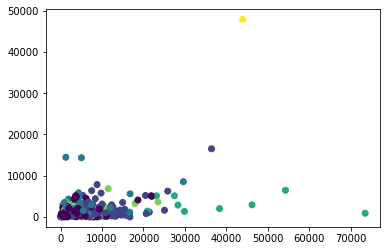

In [13]:
# 시각화
plt.scatter(x=copy_df['Milk'], y=copy_df['Delicassen'], c=copy_df['cluster_id'])
plt.show()

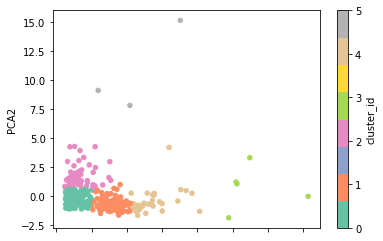

In [18]:
# PCA 차원축소 2
# 군집화 시각화 진행하는 [실습]
from sklearn.decomposition import PCA
def Do_PCA_cluster(df, principal, cluster):
    pca = PCA(n_components = principal)
    pca.fit(df)
    
    columns = ['PCA'+ str(i+1) for i in range(principal)]
    
    pca_df = pd.DataFrame(pca.transform(df), columns=columns)
    
    
    kmeans = KMeans(n_clusters=cluster)
    kmeans.fit(pca_df)
    
    pca_df['cluster_id'] = kmeans.labels_
    
    return pca_df


df = Do_PCA_cluster(copy_scaler, 2, 6)
df.plot(kind = 'scatter', x='PCA1', y='PCA2', c='cluster_id', cmap='Set2')